In [114]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats

def safelog(x):
    return(np.log(x + 1e-100))

In [115]:
data_set = np.genfromtxt("hw02_data_points.csv", delimiter = ",")
class_set = np.genfromtxt("hw02_class_labels.csv")

In [116]:
D=data_set.shape[1]    #784
X=data_set[:10000, 0:D]
y_truth=class_set[:10000].astype(int)
N=X.shape[0]  #10K

x_test=data_set[10000:, 0:D]
y_test=class_set[10000:].astype(int)
N_test=x_test.shape[0]   #5K

# get number of classes
K = np.max(y_truth).astype(int) #10

# one-of-K encoding
Y_truth = np.zeros((N, K))

Y_truth[range(N), (y_truth[:] - 1)] = 1
Y_test=np.zeros((N_test, K))
Y_test[range(N_test), (y_test[:] - 1)] = 1

In [119]:

def sigmoid(X, w, w0): #12286
    return(1 / (1 + np.exp(-(np.matmul(X, w) + w0))))   #Use this

def gradient_W(X, Y_truth, Y_predicted,K):
  
    return (np.asarray([-np.matmul(  (Y_truth[:, c] - Y_predicted[:, c])*Y_predicted[:, c]*(1-Y_predicted[:, c])   , X) 
                        for c in range(K)]).transpose())

def gradient_w0(Y_truth, Y_predicted,K):
    return(np.asarray([-np.sum((Y_truth[:, c] - Y_predicted[:, c])*Y_predicted[:, c]*(1-Y_predicted[:, c]) ) 
                        for c in range(K)]).transpose())

In [120]:
W = np.genfromtxt("hw02_W_initial.csv", delimiter = ",")
w0 = np.genfromtxt("hw02_w0_initial.csv", delimiter = ",")

# set learning parameters
eta = 0.00001
iteration_count = 1000
objective_values = []
itr=0
while True:
    Y_predicted = sigmoid(X, W, w0) 
   
    objective_values = np.append(objective_values, 0.5*(np.sum((Y_truth - Y_predicted)**2)))
    

    w_old = W
    w0_old = w0
    #print(W.shape,gradient_W(X, Y_truth, Y_predicted).shape)
    W = W - eta * gradient_W(X, Y_truth, Y_predicted,K)
    w0 = w0 - eta * gradient_w0(Y_truth, Y_predicted,K)
    itr=itr+1
    if (itr==iteration_count):
        break
        
   
    
print(W)
print(w0)

[-0.01287857 -0.02891159 -0.00873806 -0.03535891 -0.02597275 -0.06542254
 -0.01501564 -0.0451543   0.00689065 -0.01964791]
[[-0.01324798 -0.02823844 -0.00326868 ... -0.04877851  0.01212054
  -0.01143465]
 [-0.01183842 -0.03963016 -0.01295336 ... -0.04034705  0.00400381
  -0.02111644]
 [-0.01998825 -0.03633561 -0.00489235 ... -0.04108662  0.01387463
  -0.02484677]
 ...
 [-0.01341638 -0.0199712  -0.02071762 ... -0.03364511  0.00594223
  -0.01845717]
 [-0.00980747 -0.03218592 -0.02022552 ... -0.03211477  0.01611503
  -0.00845905]
 [-0.01977218 -0.02373074 -0.01468591 ... -0.04159601  0.01068509
  -0.02400039]]


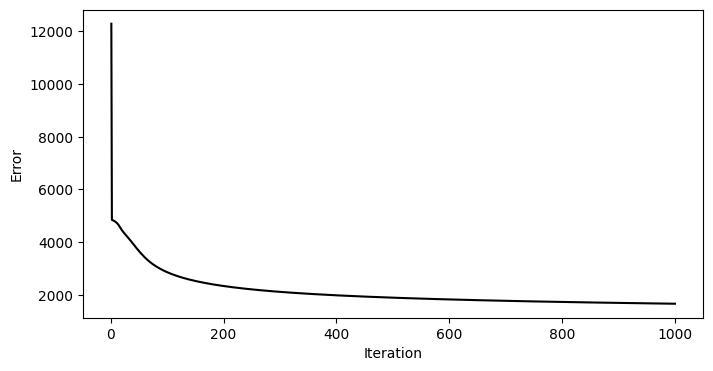

In [121]:
# plot objective function during iterations
plt.figure(figsize = (8, 4))
plt.plot(range(1, itr+1 ), objective_values, "k-")
plt.xlabel("Iteration")
plt.ylabel("Error")
plt.show()

In [122]:
# calculate confusion matrix
y_predicted = np.argmax(Y_predicted, axis = 1) + 1
confusion_matrix = pd.crosstab(y_predicted, y_truth.T,
                               rownames = ["y_pred"],
                               colnames = ["y_truth"])
print(confusion_matrix)

y_truth   1    2    3    4    5    6    7    8    9    10
y_pred                                                   
1        838    3   14   44    5    0  220    0    1    0
2          4  908    1   17    4    0    3    0    2    0
3         14   12  645   14   69    0  133    0    9    1
4         89   37    5  870   41    2   55    0   12    2
5          2    6  172   28  763    0  123    0    6    0
6         16    3   26    5    8  841   30   89   25   33
7         27    3   80   28   79    0  423    0   17    0
8          0    0    0    0    0  115    1  862    8   43
9         18    0    8    5   10   13   34    2  892    0
10         1    0    0    1    0   37    0   84    2  957


In [123]:
Y_predicted_test = sigmoid(x_test, W, w0)
y_predicted_test = np.argmax(Y_predicted_test, axis = 1) + 1
confusion_matrix = pd.crosstab(y_predicted_test, y_test.T,
                               rownames = ["y_pred"],
                               colnames = ["y_truth"])
print(confusion_matrix)
   

y_truth   1    2    3    4    5    6    7    8    9    10
y_pred                                                   
1        397    1   11   22    0    1  129    0    0    0
2          4  459    0    8    3    0    1    0    0    0
3          7   10  320    6   49    1   52    0    5    0
4         51   15    3  443   19    1   31    0   10    0
5          2    2   83   14  382    0   58    0    1    0
6          9    2   13    2    4  405   12   39   14   18
7         14    1   50   11   47    0  218    0    9    0
8          1    0    0    0    0   47    0  387    7   27
9         16    0   10    1    2    7   18    1  459    0
10         1    0    0    0    0   28    0   44    3  472
